In [31]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Dell\.cache\kagglehub\datasets\elmadafri\the-wildfire-dataset\versions\3


In [32]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [33]:
# TO ensure the GPU is present
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is Available!')
else:
  print('GPU is Unavailable!')

GPU is Unavailable!


In [34]:
# Load and explore the dataset
train_dir = 'C:/Users/Dell/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/train'
val_dir = 'C:/Users/Dell/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/val'
test_dir = 'C:/Users/Dell/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/test'

In [35]:
# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['fire', 'nofire']


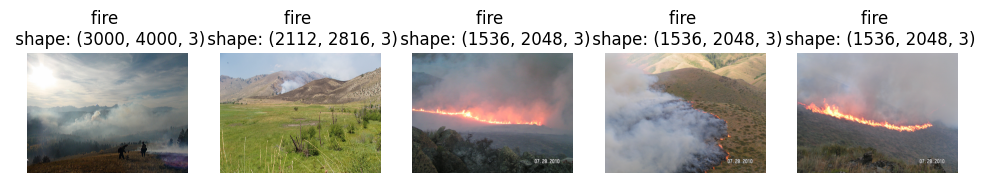

In [36]:
# Let's visualize the images in the dataset
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  # print(class_path)
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

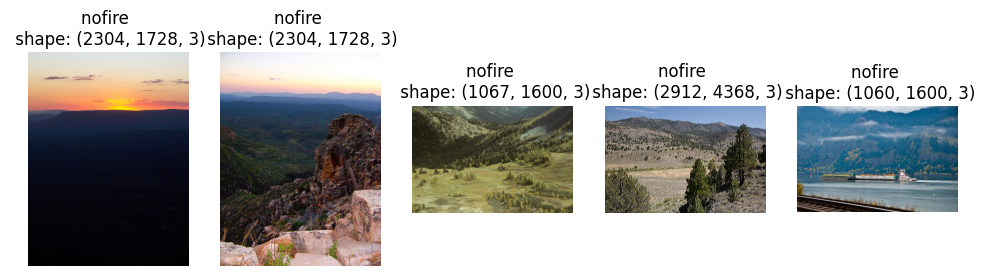

In [37]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [38]:
# Preprocessing
# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32 # there will be 32 images in a batch!

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [39]:
# map the indices
class_mapping = train_generator.class_indices
# print(class_mapping)
# Extract the class names
class_names = list(class_mapping.keys())
print("Class Names:", class_names)
     
Class_names: ['fire','nofire']

Class Names: ['fire', 'nofire']


In [40]:
# Let's build the CNN Model
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
)

In [41]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
     

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# train the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 12,
    validation_data = val_generator,
    validation_steps = val_generator.samples // batch_size
)

d:\AICTE_Internship_2025\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
42/58 ━━━━━━━━━━━━━━━━━━━━ 1:32 6s/step - accuracy: 0.5669 - loss: 0.9461

d:\AICTE_Internship_2025\tf_env\lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


54/58 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - accuracy: 0.5808 - loss: 0.8901

d:\AICTE_Internship_2025\tf_env\lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


58/58 ━━━━━━━━━━━━━━━━━━━━ 406s 7s/step - accuracy: 0.5863 - loss: 0.8716 - val_accuracy: 0.6927 - val_loss: 0.5528
Epoch 2/12
 1/58 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 0.8125 - loss: 0.4829

d:\AICTE_Internship_2025\tf_env\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


58/58 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.8125 - loss: 0.4829 - val_accuracy: 0.7266 - val_loss: 0.5311
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 387s 7s/step - accuracy: 0.7523 - loss: 0.4971 - val_accuracy: 0.7292 - val_loss: 0.5225
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.5000 - loss: 0.7941 - val_accuracy: 0.7656 - val_loss: 0.4704
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 375s 6s/step - accuracy: 0.7769 - loss: 0.4675 - val_accuracy: 0.7708 - val_loss: 0.4585
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7812 - loss: 0.5410 - val_accuracy: 0.7839 - val_loss: 0.4583
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 361s 6s/step - accuracy: 0.7882 - loss: 0.4385 - val_accuracy: 0.7865 - val_loss: 0.4701
Epoch 8/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.7188 - loss: 0.5105 - val_accuracy: 0.8021 - val_loss: 0.4370
Epoch 9/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.7904 - loss: 0.4261 - val_accuracy: 0.7682 - val_loss: 0.4561

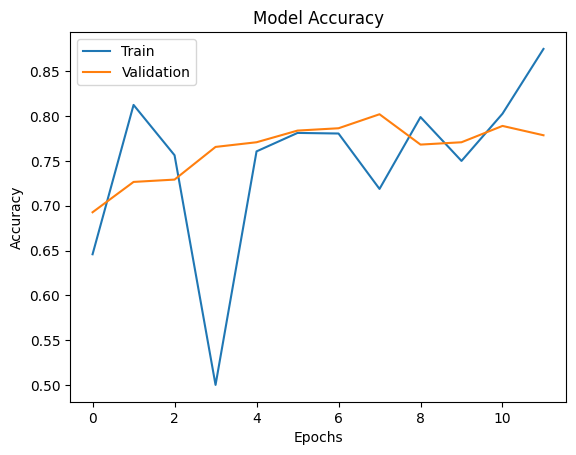

In [43]:
# Evaluate the model - plotting training and validation acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


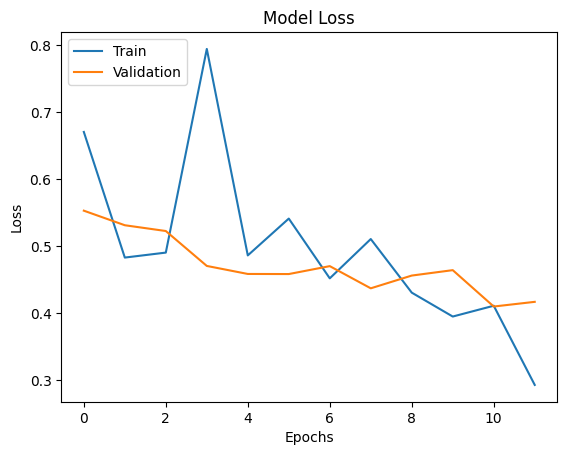

In [44]:
# Evaluate the model - plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
     

In [45]:
# Evaluate the model using test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc:.4f}')
     

12/12 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.8258 - loss: 0.3782


d:\AICTE_Internship_2025\tf_env\lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
d:\AICTE_Internship_2025\tf_env\lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Test Accuracy: 0.8151


In [46]:
# Save the model
model.save('FFD.keras')


In [47]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model('FFD.keras')

# Predict on new image - create a function
def predict_fire(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  if prediction[0] > 0.5:
    predicted_class = class_names[1]
  else:
    predicted_class = class_names[0]

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()

In [48]:
os.listdir('C:/Users/Dell/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/test/nofire'
)


['23289748533_1a14a0f249_o.jpg',
 '24498907094_491ca433dd_o.jpg',
 '33696343816_811bd98925_o.jpg',
 '35554264024_b33afa21ac_o.jpg',
 '35581707273_fed23248e8_o.jpg',
 '36644001004_f3e3a56edc_o.jpg',
 '39728540251_888dc24afa_o.jpg',
 '41058079202_08ce34a338_o.jpg',
 '42376136734_b4524237bf_o.jpg',
 '43078090081_07d1f9ec0f_o.jpg',
 '45636031272_8408d32834_o.jpg',
 '49200563427_e5295b4455_o.jpg',
 '49422069676_3e89abc052_o.jpg',
 '50010867961_903b6432f7_o.jpg',
 '50380847112_db217aea45_o.jpg',
 '51099217941_143488e656_o.jpg',
 '52357656897_dde5e5a66a_o.jpg',
 '52358616216_ec885ff145_o.jpg',
 '52358931719_b6fbcc77f2_o.jpg',
 '52359026765_4a4ba189c8_o.jpg',
 '52359041065_1566fd6ec1_o.jpg',
 '52452040025_916ddf3f9d_o.jpg',
 '52452051055_4e2a4e4de0_o.jpg',
 '53078944067_43c7e3552a_o.jpg',
 'adrian-mag-l9p-7JBmVFE-unsplash.jpg',
 'alan-hardman-pLq3oZDUEWk-unsplash.jpg',
 'ales-krivec-7-Og8aZTRyM-unsplash.jpg',
 'ales-krivec-sTEg_SLAyUs-unsplash.jpg',
 'ales-krivec-VfMgiZscSXE-unsplash.jpg',
 'a

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


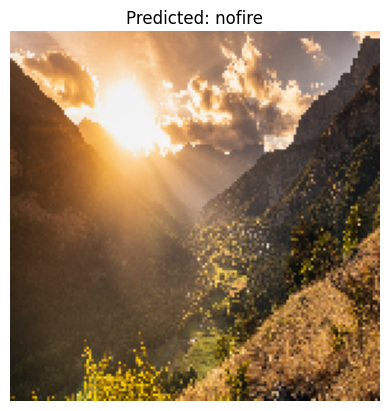

In [53]:
predict_fire(r'C:\Users\Dell\.cache\kagglehub\datasets\elmadafri\the-wildfire-dataset\versions\3\the_wildfire_dataset_2n_version\test\nofire\marek-piwnicki-DCGABYDIdT0-unsplash.jpg')
     